# King County Housing Prices: A Multiple Regression Analysis

By Brittney Nitta-Lee

The King County Housing Data Set contains information about the size, location, condition, and other features of houses in King County. The goal of this project is to develop a multiple regression model than can predict a house's price as accurately as possible.

# Column Names and descriptions for King County Data Set

-  __id__ - unique identified for a house
-  __date__ - house was sold
-  __price__ - is prediction target
-  __bedrooms__ - number of bedrooms 
-  __bathrooms__ - number of bathrooms
-  __sqft_livingsquare__ - Square footage of the home
-  __sqft_lotsquare__ - Square footage of the lot
-  __floors__ - total floors in house
-  __waterfront__ - homes which has a view to a waterfront
-  __view__ - Quality of view from house
-  __condition__ - How good the condition is ( Overall )
-  __grade__ - overall grade given to the housing unit, based on King County grading system
-  __sqft_above__ - square footage of house apart from basement
-  __sqft_basement__ - square footage of the basement
-  __yr_built__ - Built Year
-  __yr_renovated__ - Year when house was renovated
-  __zipcode__ - zip
-  __lat__ - Latitude coordinate
-  __long__ - Longitude coordinate
-  __sqft_living15__ - The square footage of interior housing living space for the nearest 15 neighbors
-  __sqft_lot15__ - The square footage of the land lots of the nearest 15 neighbors

In [2]:
#import necessary modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

The first step is loading and previewing the dataframe.

In [3]:
#load and preview data frame
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Next is to check the datatypes and shape.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [6]:
df['price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

In [7]:
df['price'].value_counts().sort_values(ascending=False)

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
455800.0      1
406650.0      1
291970.0      1
324747.0      1
398950.0      1
Name: price, Length: 3622, dtype: int64

In [8]:
df['price'].value_counts().sort_values(ascending=True)

398950.0      1
324747.0      1
291970.0      1
406650.0      1
455800.0      1
           ... 
425000.0    150
500000.0    152
550000.0    159
450000.0    172
350000.0    172
Name: price, Length: 3622, dtype: int64

The dataset, containing more than 21 thousand entries and 20 columns. There's missing data in some categories but we will explore that in the data cleaning proccess section. 

Now it's time to look at the distribution of variables in the dataset.

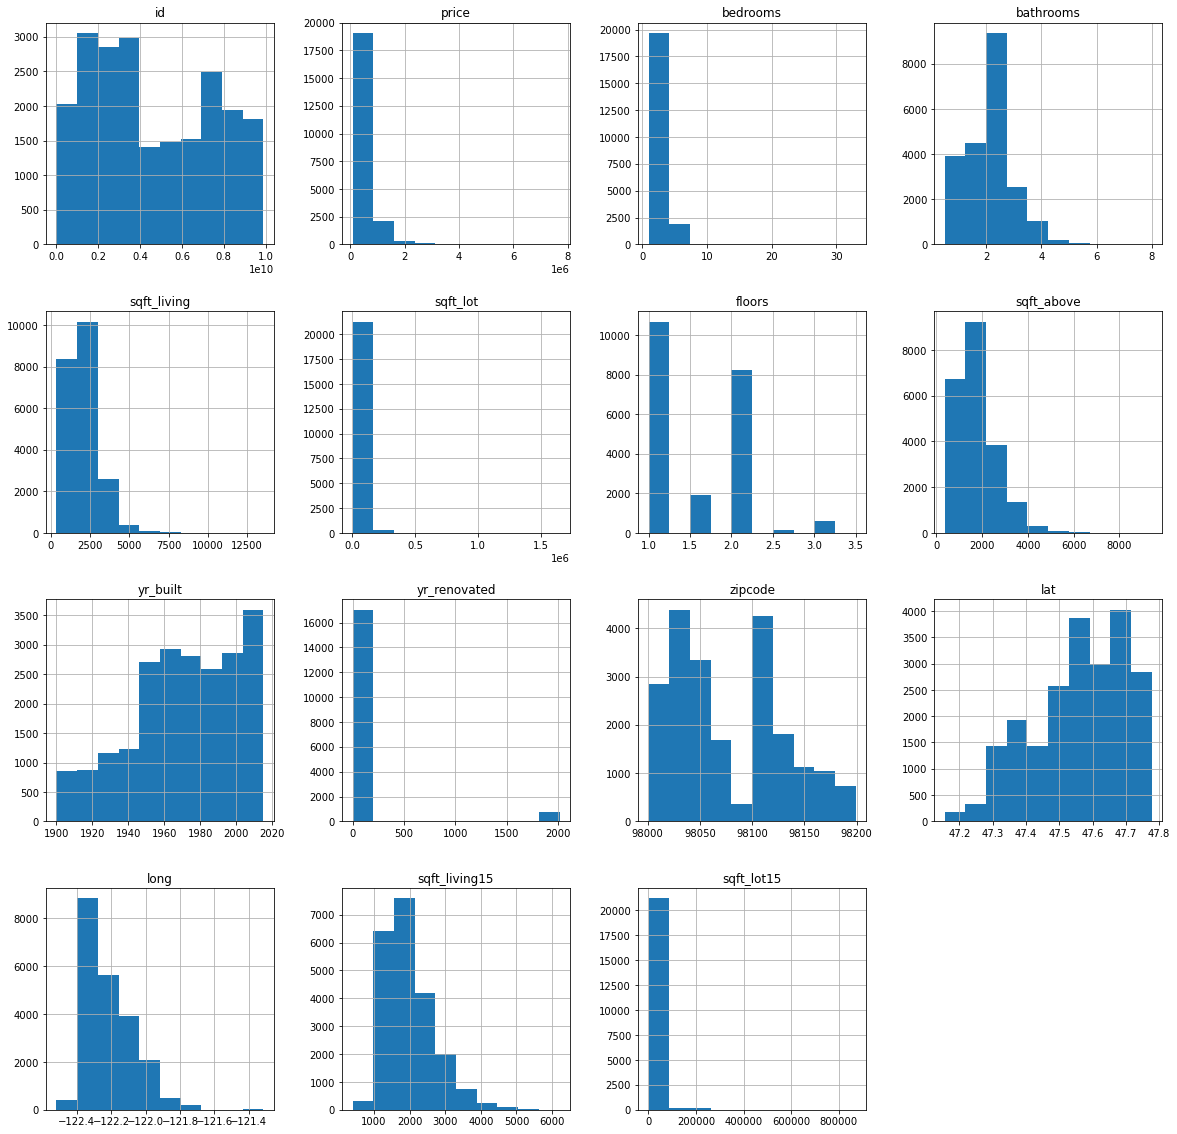

In [9]:
df.hist(figsize=(20,20));

Majority of the variables in the dataset do not folllow a normal distribution. There could be a few reasons why which are outliers or insufficient data. 

<h1> Data Cleaning </h1>

It's time to look at the missing data for each columns. The columns with missing data are Waterfront, View and Year Renovated. 

In [10]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [11]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [12]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [13]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

The building grade of each house has an interesting rating. Below you'll find the definition of the grade of each house. I want to incorporate these into my project.

According to the <a href="https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r">King County Glossary of Terms</a> Building grade is defined as: 
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1. Falls short of minimum building standards. Normally cabin or inferior structure.

2. Falls short of minimum building standards. Normally cabin or inferior structure.

3. Falls short of minimum building standards. Normally cabin or inferior structure.

4. Generally older, low quality construction. Does not meet code.

5. Low construction costs and workmanship. Small, simple design.

6. Lowest grade currently meeting building code. Low quality materials and simple designs.

7. Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8. Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9. Better architectural design with extra interior and exterior design and quality.

10. Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11. Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12. Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13. Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

Since 1 to 3 is in the same category, I will create the building grades from numbers 3 through 11. I will start with 3 instead of 1 because the value counts start at 3 as poor.

In [14]:
#label encoding grade to numbers
df['grade'] = df['grade'].replace(
    to_replace =['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', 
                 '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'],
    value = [3,4,5,6,7,8,9,10,11,12,13])

In [15]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

Much better! It's good to know that there's only one house with a Building Grade of 3. Since I'm focusing on all houses in this data set, I will keep it as is.

Let's take a look at the column called condition.

In [16]:
df['condition'].describe()

count       21597
unique          5
top       Average
freq        14020
Name: condition, dtype: object

In [17]:
df['condition'].nunique()

5

In [18]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

Looks the like values range from 1 to 5. Since I am using the condition in my regression model, the column needs to be on a numerical scale.

In [19]:
#label encoding condition to numbers
df['condition'] = df['condition'].replace(
    to_replace=['Poor', 'Fair', 'Average', 'Good', 'Very Good'],
    value=[1,2,3,4,5])

In [20]:
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

For my analysis, since the data for Waterfront, View and Year renovated contains missing data and is not needed, we can drop those columns. Also, as a resident of King County, a home with either a waterfront or view is rare. 

In [21]:
#drop year renovated column
df.drop('yr_renovated', axis=1, inplace=True)

In [22]:
#drop waterfront column
df.drop('waterfront', axis=1, inplace=True)

In [23]:
#drop view column
df.drop('view', axis=1, inplace=True)

In [24]:
#change price type to int
df = df.astype({'price':'int'})
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


### Categorical Variables

Since the price column is the dependent variable for this project, I want to see how other columns affect the price. Let's take a look at the dataset one more time. The categorical columns are condition and grade. 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

In [26]:
#OHE 
cat_var = ['condition', 'grade']
df = pd.get_dummies(
    df, prefix=cat_var, columns=cat_var, drop_first=True)

In [27]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,1180,0.0,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,2170,400.0,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,770,0.0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,1050,910.0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,1680,0.0,...,0,0,0,0,1,0,0,0,0,0


Great! Now we can move on and use these for our linear regression model. 

### Identify Multicollinearity

Let's use a scatter matrix to check the variable distributions to see how each variables are related to one another.

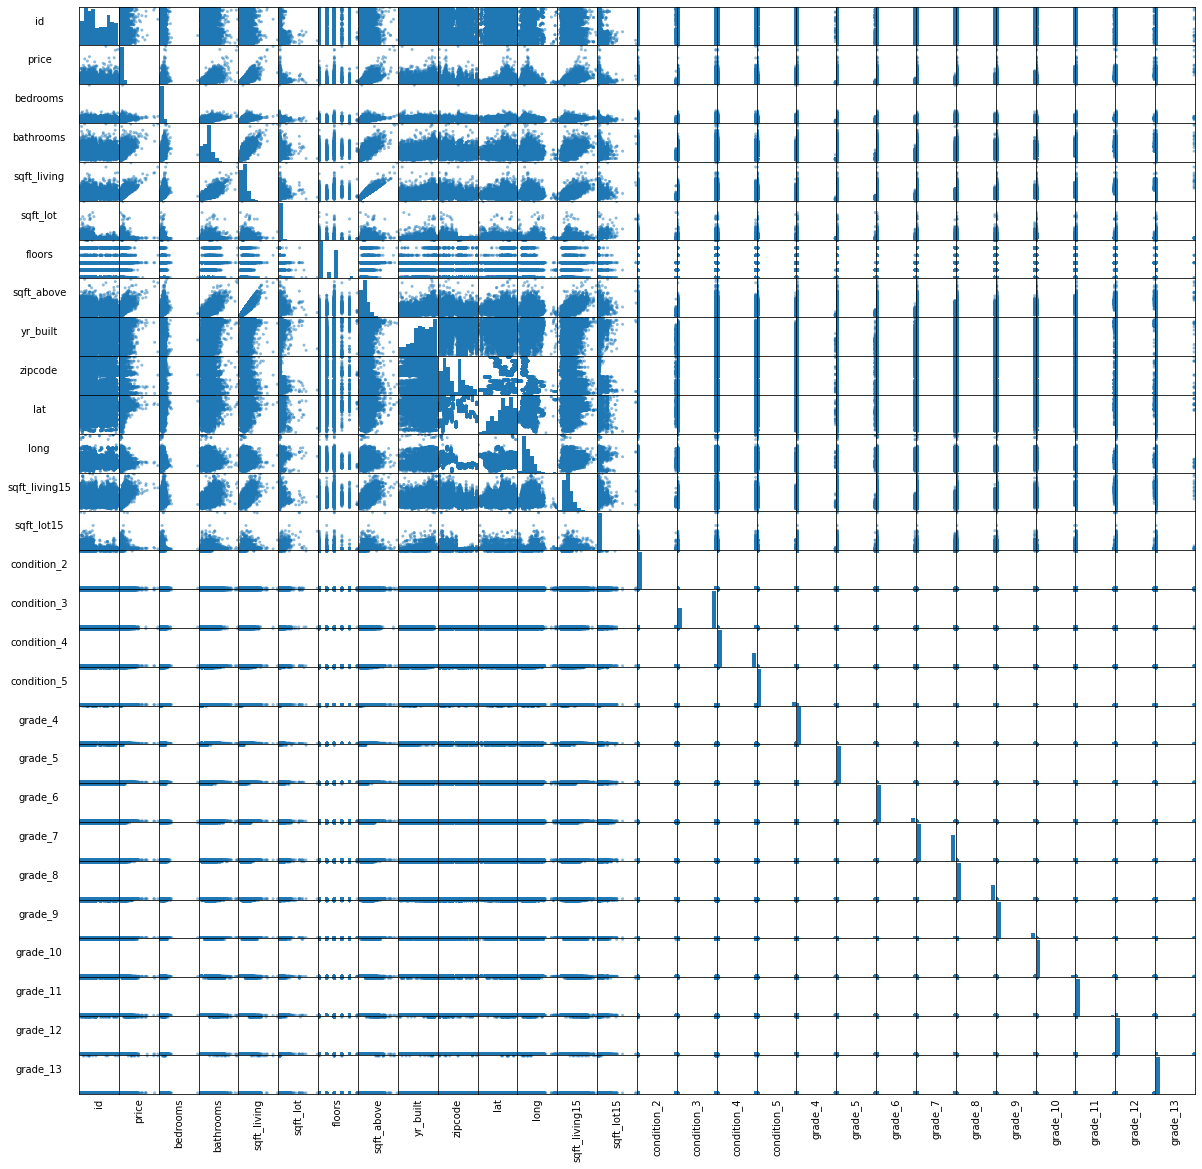

In [28]:
sm = pd.plotting.scatter_matrix(df, figsize=[20, 20]);

# Rotates the text
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

That's a lot. Let's look closely at the correlation to return pairwise correlations. I'm going to create a new dataframe called df_correlation.

In [29]:
df_correlation = df
df_correlation.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,1180,0.0,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,2170,400.0,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,770,0.0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,1050,910.0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,1680,0.0,...,0,0,0,0,1,0,0,0,0,0


In [30]:
df_correlation.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.008211,...,-0.002903,-0.025640,-0.015476,-0.015575,0.042285,0.009121,-0.014390,-0.019837,-0.015084,-0.003880
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,-0.053402,...,-0.031618,-0.084549,-0.209463,-0.316053,0.004576,0.235859,0.340944,0.357589,0.291068,0.211806
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,-0.154092,...,-0.068012,-0.113175,-0.239492,-0.104791,0.073140,0.160294,0.135766,0.116596,0.062257,0.039026
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,-0.204786,...,-0.055599,-0.138740,-0.366185,-0.313457,0.189426,0.264756,0.272635,0.247293,0.159734,0.095118
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,-0.199802,...,-0.053935,-0.127198,-0.312486,-0.358915,0.071115,0.318499,0.369228,0.345964,0.238136,0.144424
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,-0.129586,...,0.000440,0.022931,-0.019116,-0.067791,-0.023923,0.049646,0.074421,0.077104,0.061699,0.007767
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,-0.059541,...,-0.029964,-0.080346,-0.230529,-0.308247,0.201188,0.244184,0.173943,0.118735,0.054276,0.021257
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,-0.261570,...,-0.047669,-0.108543,-0.280761,-0.387255,0.059423,0.343388,0.376399,0.342198,0.222177,0.126666
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.347210,...,-0.041843,-0.128815,-0.313501,-0.211966,0.199844,0.220104,0.148820,0.098762,0.046874,0.004692
zipcode,-0.008211,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.261570,-0.347210,1.000000,...,-0.006163,0.009434,0.148832,0.070285,-0.052619,-0.087750,-0.073251,-0.058189,-0.039301,0.003762


Correlations with an aboslute value around 0.7-.08 is considered high. I'm going to take 0.75 as a cut-off. 

In [31]:
abs(df_correlation.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
zipcode,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [32]:
df = df_correlation.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']

df.drop_duplicates(inplace=True)
#return highly correlated pairs
df[(df.cc>.75) & (df.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(condition_4, condition_3)",0.812294
"(sqft_living, sqft_living15)",0.756402
"(bathrooms, sqft_living)",0.755758


### Question 1: Which features are most highly correlated with price?

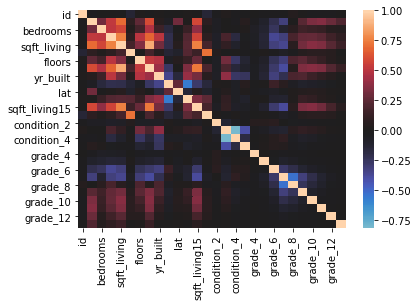

In [33]:
sns.heatmap(df_correlation.corr(), center=0);

It seems like sqft_living, bathrooms, sqft_above, and condition are highly correlated among each other. While the condition of the home and sqft living are highly correlated with price.

### Pairplot

Let's see if the variables have a linear relationship with our house price. 

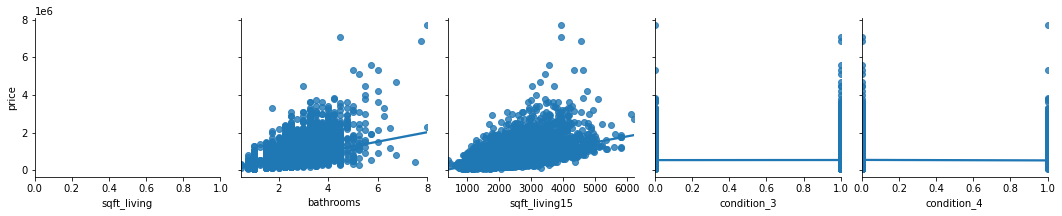

In [34]:
sns.pairplot(df_correlation, 
             x_vars=["sqft_living","bathrooms","sqft_living15", "condition_3", "condition_4"],
             y_vars="price",
             kind ='reg',
             height = 3)

### Run the multiple regression

In [35]:
Model_1 = smf.ols(formula="price ~ condition_3 + condition_4 + bathrooms + sqft_living15  + sqft_living", data=df_correlation).fit()
Model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     4434.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:46:17   Log-Likelihood:            -2.9976e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21591   BIC:                         5.996e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.692e+04   8019.487     -3.357      0.001   -4.26e+04   -1.12e+04
condition_3   -1.043e+05   6357.139    -16.401      0.000   -1.17e+05   -9.18e+04
condition_4   -6.604e+04   6851.158     -9.640      0.000   -7.95e+04   -5.26e+04
bathrooms      3209.5992   3543.538      0.906      0.365   -3735.998    1.02e+04
sqft_living15    73.1732      3.929     18.622      0.000      65.471      80.875
sqft_living     240.3983      3.684     65.259      0.000     233.178     247.619
==============================================================================
Omnibus:                    15670.814   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           708449.398
Skew:                           3.003   Prob(JB):                         0.00
Kurtosis:                      30.408   Cond. No.                     1.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared is 0.507, which shows that the condition, bathrooms, sqft_living and sqft_living15 of a home contributes 50.7% to the price. The p-value for bathrooms show 0.40 but the rest are zero, which means we can reject the null hypothesis.

## Question 2: Which feature has the strongest correlation with the value of a home?

### Linear Regression Model

Next, I'll create a simple linear regression model for each of the chose condition, sqft_living, sqft_living15 and bathrooms that satisfy linearity, and test the assumptions for each. But, before we do that, I will need to do some statistical tests to do the linear regression. 

Before building the simple linear regression model, here's what needs to be checked: 
- Residuals must follow a normal distribution
- Residuals are homoscedasticity
- There's no multicolinearity between the independent variables
<br><i><a href="https://towardsdatascience.com/all-the-statistical-tests-you-must-do-for-a-good-linear-regression-6ec1ac15e5d4">Gustavo Santos, All Statistical Tests You Must do For a Good Linear Regression</i></br></a>

### Train-Test Split

To avoid data leakage, let's do a train-test split. I will arrange the data into features and target. In this case, we are focusings on sqft_living, bathrooms and sqft_living15. Our target is the value of a home. The train-test split takes 75% of the data as the training subset and the other 25% as its test subset. In this case I will set the test_size to 0.20 so 20% of the data is used for testing and 80% is for training.

In [36]:
#set the y and x inputs 
features = ['bathrooms','sqft_living','sqft_living15']
X = df_correlation.loc[:, features]
y = df_correlation.loc[:, ['price']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Perform a log transformation on the training set
X_train_log = np.log(X_train)

# Apply the same transformation to the test set
X_test_log = np.log(X_test)

# Perform a log transformation on the y_train set
y_train_log = np.log(y_train)

# Apply the same transformation to the y_test set
y_test_log = np.log(y_test)

In [37]:
X_train

,bathrooms,sqft_living,sqft_living15
3930,3.25,3786,2850
8267,1.00,860,1140
15607,2.25,1470,1720
6680,1.75,1640,1480
6999,2.75,2840,2750
...,...,...,...
13123,1.75,1250,1680
19648,2.50,1830,2330
9845,1.75,1460,1970
10799,1.00,1120,1820


In [38]:
y_train

,price
3930,1380000
8267,82000
15607,220000
6680,369950
6999,870000
...,...
13123,468000
19648,275000
9845,629000
10799,442500


In [39]:
X_test_log

,bathrooms,sqft_living,sqft_living15
156,1.252763,8.283999,7.878534
15572,0.810930,7.635304,7.654443
2080,0.916291,8.035926,8.051978
17522,0.559616,7.114769,7.346010
8360,1.011601,8.055158,7.700748
...,...,...,...
16922,0.693147,7.003065,7.319865
12225,0.810930,7.791523,7.677864
10452,1.098612,7.779049,7.339538
12354,0.916291,8.083329,8.306472


In [40]:
X_train_log

,bathrooms,sqft_living,sqft_living15
3930,1.178655,8.239065,7.955074
8267,0.000000,6.756932,7.038784
15607,0.810930,7.293018,7.450080
6680,0.559616,7.402452,7.299797
6999,1.011601,7.951559,7.919356
...,...,...,...
13123,0.559616,7.130899,7.426549
19648,0.916291,7.512071,7.753624
9845,0.559616,7.286192,7.585789
10799,0.000000,7.021084,7.506592


In [41]:
# Compute the correlation coefficients between the transformed features and target variable
df_train = pd.concat([X_train_log, y_train], axis=1)
corr_matrix = df_train.corr()
corr_price = corr_matrix['price'].abs().sort_values(ascending=False)

# Print the correlation coefficients in descending order
print(corr_price)

price            1.000000
sqft_living      0.611735
sqft_living15    0.541432
bathrooms        0.456513
Name: price, dtype: float64


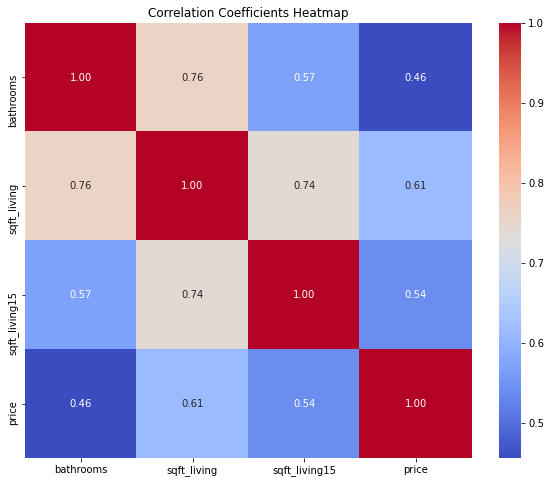

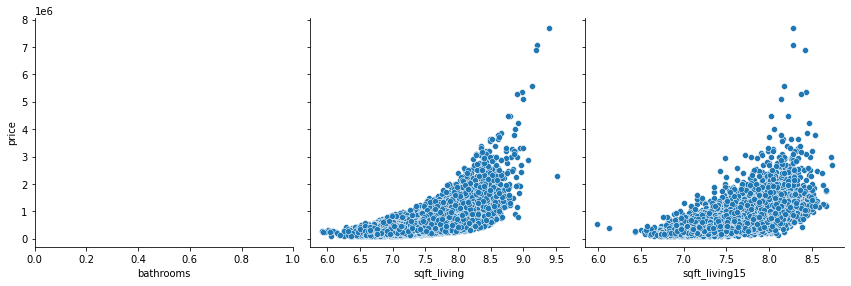

In [42]:
# Compute the correlation coefficients between the transformed features and target variable
df_train = pd.concat([X_train_log, y_train], axis=1)
corr_matrix = df_train.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Coefficients Heatmap')
plt.show()

# Plot a scatter plot matrix of the transformed features and target variable
sns.pairplot(df_train, x_vars=['bathrooms', 'sqft_living', 'sqft_living15'], y_vars=['price'], height=4)
plt.show()

The heatmap and the scatterplot matrix of the correlation coefficients between the the value of a home and features (bathrooms, sqft_living and sqft_living15, helps visualize the relationships between the variables. According to the correlation coefficients, sqft_living has the strongest linear relationship with price while the number of bathrooms is the lowest.

### Question 3: What combination of features is the best fit for a multiple regression model to predict house prices?

Now that we see sqft_living has the strongest linear relationship with price, let's see what combination of features are best fit to predict the price of homes.

### Multiple Regression

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def multiple_regression(X_train, X_test, y_train, y_test):
    """
    Builds a multiple regression model to predict house prices.

    Parameters:
        X_train (pandas DataFrame): The training independent variables.
        X_test (pandas DataFrame): The testing independent variables.
        y_train (pandas Series): The training dependent variable.
        y_test (pandas Series): The testing dependent variable.

    Returns:
        A tuple containing the model coefficients, root mean squared error (RMSE), and R-squared (R2) score.
    """
    # Fit the multiple regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the house prices using the testing independent variables
    y_pred = model.predict(X_test)

    # Compute the RMSE and R2 score of the model
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Return the model coefficients, RMSE, and R2 score
    return model.coef_, rmse, r2

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform multiple regression and print the results
coef, rmse, r2 = multiple_regression(X_train, X_test, y_train, y_test)
print('Coefficients:', coef)
print('RMSE:', rmse)
print('R2 Score:', r2)

Coefficients: [[-2654.23823093   243.76564877    70.91950967]]
RMSE: 255530.10351598472
R2 Score: 0.49856013590601167


### Conclusions

The squarefootage of a home and number of bathrooms are the best predictors of a home's price in King County. If homeowners are able to, they should expand the square footage of their home and build additional bathrooms. 

### Limitations 

There was a lot of preprocessing and variables we had to perform log transformations on variables to satisfy regression assumptions. Therefore, the model may not accurately predict a home's value. A future analysis could include looking at data in other counties and using an updated dataset. 